# Introdução a Redes neurais com MLP

## Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

## 1. Aquisição de dados

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

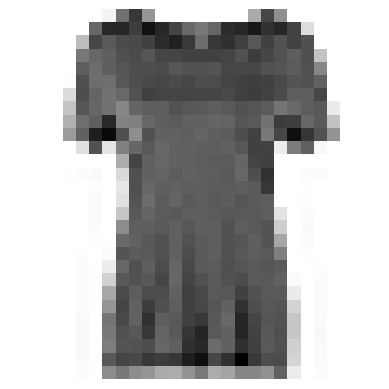

In [5]:
#testar diferentes exemplos
plt.imshow(X_train[10], cmap="binary")
plt.axis('off')
plt.show()

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

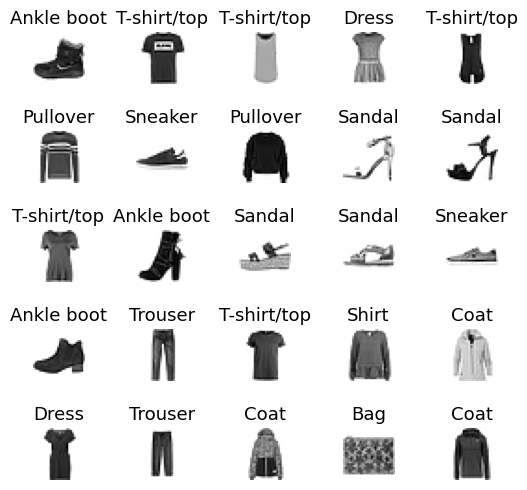

In [8]:
n_rows = 5
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=13)
plt.subplots_adjust(wspace=1.0, hspace=0.5)
plt.show()

## 2. Pré-processamento

In [9]:
# Criar um conj de validação de 5k e mudar a escala dos pixels de 0-255 para 0-1 (float)
X_valid, X_train = X_train[:5000] / 255., X_train[5000:] / 255.
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.

## 3. Construindo a arquitetura

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
model

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
hidden1 = model.layers[1]

In [14]:
weights, biases = hidden1.get_weights()

In [15]:
weights.shape

(784, 300)

In [16]:
biases.shape

(300,)

In [17]:
hidden2 = model.layers[2]

In [18]:
weights, biases = hidden2.get_weights()

In [19]:
weights.shape

(300, 100)

In [20]:
biases.shape

(100,)

In [21]:
output = model.layers[3]

In [22]:
weights, biases = output.get_weights()

In [23]:
weights.shape

(100, 10)

In [24]:
biases.shape

(10,)

## 4. Treinando a rede

In [25]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

### 4.1. Parâmetros do treino

- loss="sparse_categorical_crossentropy"

Pr(Class A) | **Pr(Class B)** | Pr(Class C)

y_true = [1] -> 0.0       |   1.0        |  0.0  

Pr(Class A) | Pr(Class B) |  Pr(Class C)     

0.228     |     0.619        |   0.153

![Entropia Cruzada](https://miro.medium.com/max/480/1*loucyTXzGHuHi6D4PxjDlA.png)

Resp: 0.479 -> valor do erro da entropia cruzada

- optimizer="sgd" (Stochastic Gradient Descent)

![Gradiente Descendente](https://miro.medium.com/max/1398/1*IxMLWG1xsZ50b91M5VJXSA.jpeg) 
![title](gradient.png) 
![Taxa de Aprendizado](https://miro.medium.com/max/1050/1*vuMse7jQQXTcWZdQ9gRGCw.png) 
![Variações do Gradiente](https://miro.medium.com/max/1050/1*TD5xBpl6YP1McZoKBfVyDA.png) 

In [26]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2025-01-08 09:04:35.215085: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1719/1719 [==============================] - 2s 1ms/step - loss: 0.7180 - accuracy: 0.7628 - val_loss: 0.5147 - val_accuracy: 0.8262
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4870 - accuracy: 0.8306 - val_loss: 0.4473 - val_accuracy: 0.8484
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4396 - accuracy: 0.8457 - val_loss: 0.4131 - val_accuracy: 0.8582
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4124 - accuracy: 0.8546 - val_loss: 0.4070 - val_accuracy: 0.8590
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3928 - accuracy: 0.8623 - val_loss: 0.4375 - val_accuracy: 0.8378
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3770 - accuracy: 0.8666 - val_loss: 0.3734 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3643 - accuracy: 0.8713 - val_loss: 0.3725 - val_accuracy: 0.8670
Epo

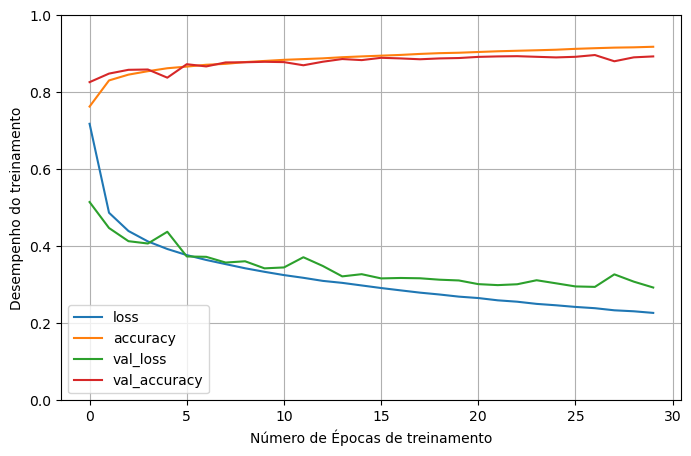

In [27]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Número de Épocas de treinamento")
plt.ylabel("Desempenho do treinamento")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2227 - accuracy: 0.9203 - val_loss: 0.2891 - val_accuracy: 0.8958
Epoch 2/15
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2198 - accuracy: 0.9205 - val_loss: 0.2940 - val_accuracy: 0.8950
Epoch 3/15
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2160 - accuracy: 0.9223 - val_loss: 0.3188 - val_accuracy: 0.8882
Epoch 4/15
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2124 - accuracy: 0.9235 - val_loss: 0.2849 - val_accuracy: 0.8998
Epoch 5/15
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2108 - accuracy: 0.9241 - val_loss: 0.2899 - val_accuracy: 0.8980
Epoch 6/15
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2057 - accuracy: 0.9257 - val_loss: 0.2935 - val_accuracy: 0.8962
Epoch 7/15
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2036 - accuracy: 0.9271 - val_loss: 0.2892 - val_accuracy:

In [29]:
history = model.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid))

Epoch 1/60
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1755 - accuracy: 0.9376 - val_loss: 0.3028 - val_accuracy: 0.8966
Epoch 2/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1723 - accuracy: 0.9378 - val_loss: 0.3301 - val_accuracy: 0.8852
Epoch 3/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1704 - accuracy: 0.9379 - val_loss: 0.2854 - val_accuracy: 0.8982
Epoch 4/60
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1683 - accuracy: 0.9396 - val_loss: 0.2917 - val_accuracy: 0.8950
Epoch 5/60
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1643 - accuracy: 0.9406 - val_loss: 0.3030 - val_accuracy: 0.8876
Epoch 6/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1620 - accuracy: 0.9420 - val_loss: 0.2990 - val_accuracy: 0.8976
Epoch 7/60
1719/1719 [==============================] - 2s 1ms/step - loss: 0.1597 - accuracy: 0.9432 - val_loss: 0.2988 - val_accuracy:

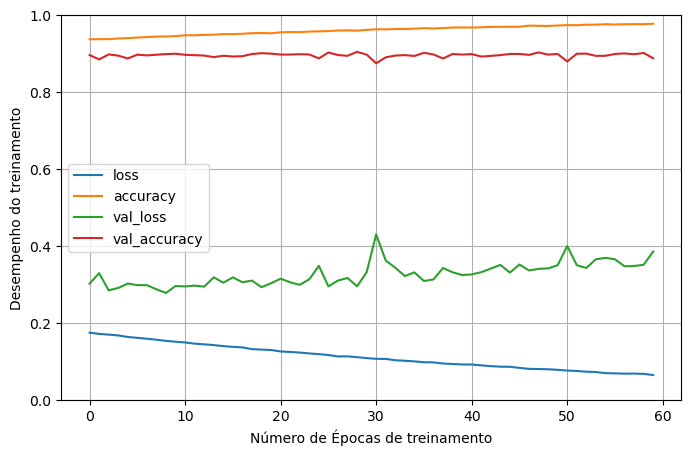

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Número de Épocas de treinamento")
plt.ylabel("Desempenho do treinamento")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 5. Testando o modelo

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 714us/step - loss: 0.4450 - accuracy: 0.8827


[0.4450456500053406, 0.8827000260353088]

In [55]:
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 62ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.63, 0.  , 0.  , 0.  , 0.  , 0.  , 0.37, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [45]:
# Pega a posição do maior valor na linha
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 17ms/step


array([9, 2, 1, 1, 0, 1, 4, 6, 5, 7])

In [46]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 0s 939us/step


In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score
print('Acurácia: ', accuracy_score(y_test,y_pred))
print('Kappa: ', cohen_kappa_score(y_test,y_pred))
print('Matriz de confusão: \n', confusion_matrix(y_test,y_pred))

Acurácia:  0.8827
Kappa:  0.8696666666666667
Matriz de confusão: 
 [[864   2  11   9   4   1 100   0   9   0]
 [  8 966   4  14   3   0   4   0   1   0]
 [ 28   0 805   6  55   2  99   0   5   0]
 [ 45   7  11 836  29   1  67   0   4   0]
 [  1   1  83  31 749   1 131   0   3   0]
 [  1   0   0   0   0 970   0  18   0  11]
 [124   0  59  13  21   1 773   0   9   0]
 [  0   0   0   0   0  21   0 963   0  16]
 [  9   0   6   4   3   4  12   4 958   0]
 [  0   0   0   0   0  14   1  42   0 943]]


In [48]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## 6. Salvando o modelo

In [49]:
model.save("modelo_mlp.h5")

In [50]:
model = keras.models.load_model("modelo_mlp.h5")

In [51]:
np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 0s 1ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [52]:
checkpoint = keras.callbacks.ModelCheckpoint("melhor_modelo_mlp.h5", save_best_only=True)

In [53]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), callbacks=[checkpoint])

Epoch 1/15
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0643 - accuracy: 0.9784 - val_loss: 0.3629 - val_accuracy: 0.9028
Epoch 2/15
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0629 - accuracy: 0.9789 - val_loss: 0.3933 - val_accuracy: 0.8940
Epoch 3/15
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0633 - accuracy: 0.9787 - val_loss: 0.3676 - val_accuracy: 0.8964
Epoch 4/15
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0614 - accuracy: 0.9788 - val_loss: 0.3587 - val_accuracy: 0.9010
Epoch 5/15
1719/1719 [==============================] - 3s 1ms/step - loss: 0.0594 - accuracy: 0.9805 - val_loss: 0.3670 - val_accuracy: 0.8996
Epoch 6/15
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0589 - accuracy: 0.9803 - val_loss: 0.3846 - val_accuracy: 0.8970
Epoch 7/15
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0567 - accuracy: 0.9817 - val_loss: 0.3680 - val_accuracy:

$Atividade:$ Treine uma MLP profunda no conjunto de dados MNIST e tente conseguir obter mais de 98% de precisão. Dica: faça a aquisição dos dados usando o Keras (keras.datasets.mnist.load_data()).